<a href="https://colab.research.google.com/github/marofmar/ResearchProjects/blob/main/lalonde_1130.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 11월 30일

- 기본 Sklearn Linear model 이용
- Lasso는 피팅이 안됨
- Logistic Regression, Ridge regression 굉장히 비슷하게 피팅됨
- ScoreMatching: 단순 거리 차이 (Euclidean distance)
- Matching w/ Replacement

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
lalonde = pd.read_csv("nsw_shuffled.csv", index_col = 0)

In [3]:
lalonde.head()

,treatment,age,education,Black,Hispanic,married,nodegree,RE75,RE78
0,1.0,20.0,9.0,0.0,1.0,0.0,1.0,5875.049,1358.643
1,0.0,29.0,9.0,0.0,1.0,0.0,1.0,16341.160,16900.300
2,0.0,18.0,9.0,1.0,0.0,0.0,1.0,2006.629,6546.010
3,0.0,24.0,11.0,1.0,0.0,0.0,1.0,0.000,0.000
4,0.0,28.0,8.0,1.0,0.0,0.0,1.0,10610.080,4623.188


In [4]:
lalonde.describe()

,treatment,age,education,Black,Hispanic,married,nodegree,RE75,RE78
count,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000
mean,0.411357,24.520776,10.267313,0.800554,0.105263,0.162050,0.779778,3042.896575,5454.635848
std,0.492421,6.625947,1.704774,0.399861,0.307105,0.368752,0.414683,5066.143366,6252.943422
min,0.000000,17.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.000000,9.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,23.000000,10.000000,1.000000,0.000000,0.000000,1.000000,936.307950,3951.889000
75%,1.000000,27.000000,11.000000,1.000000,0.000000,0.000000,1.000000,3993.207000,8772.004250
max,1.000000,55.000000,16.000000,1.000000,1.000000,1.000000,1.000000,37431.660000,60307.930000


In [5]:
lalonde.isnull().sum()

treatment    0
age          0
education    0
Black        0
Hispanic     0
married      0
nodegree     0
RE75         0
RE78         0
dtype: int64

In [13]:
from sklearn import linear_model

In [17]:
z = lalonde.treatment 
X = lalonde[['age', 'education', 'Black', 'Hispanic', 'married', 'nodegree']].values

In [40]:
ps = pd.DataFrame({'Treatment': lalonde.treatment})

In [41]:
ridge = linear_model.Ridge()

In [42]:
ridge.fit(X, z)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [43]:
ps['Ridge'] = ridge.predict(X)

In [44]:
lasso = linear_model.Lasso()

In [45]:
lasso.fit(X, z)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [46]:
ps['Lasso'] = lasso.predict(X)

In [47]:
ps['Lasso']

0      0.411357
1      0.411357
2      0.411357
3      0.411357
4      0.411357
         ...   
717    0.411357
718    0.411357
719    0.411357
720    0.411357
721    0.411357
Name: Lasso, Length: 722, dtype: float64

In [48]:
lr = linear_model.LogisticRegression()

In [49]:
lr.fit(X, z)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
ps['Logistic'] = lr.predict_proba(X)[:,0]

In [65]:
ps['Logistic 2'] = lr.predict_proba(X)[:,1] # legit

In [66]:
ps

,Treatment,Ridge,Lasso,Logistic,Logistic 2
0,1.0,0.354465,0.411357,0.642987,0.357013
1,0.0,0.351055,0.411357,0.645755,0.354245
2,0.0,0.391251,0.411357,0.609046,0.390954
3,0.0,0.378004,0.411357,0.620011,0.379989
4,0.0,0.392950,0.411357,0.607690,0.392310
...,...,...,...,...,...
717,1.0,0.501551,0.411357,0.500905,0.499095
718,1.0,0.385385,0.411357,0.613907,0.386093
719,1.0,0.520328,0.411357,0.482228,0.517772
720,0.0,0.385385,0.411357,0.613907,0.386093


In [61]:
def show_pre_match_before(data, treatment_colname, algo_colname):
    plt.figure(figsize = (9, 6))
    
    treatment = data[data[treatment_colname]==1]
    control = data[data[treatment_colname]==0]
    
    dic_treat = dict(list(zip(treatment[algo_colname].index, treatment[algo_colname])))
    dic_control = dict(list(zip(control[algo_colname].index, control[algo_colname])))
    
    plt.title(algo_colname)
    plt.hist(list(dic_treat.values()), density = True, bins = 50, alpha = 0.5, label = '1')
    plt.hist(list(dic_control.values()), density = True, bins = 50, alpha = 0.5, label = '0')
    plt.legend(loc = 'upper right')
    
    #plt.savefig('pre_matching_before '+algo_colname+str(date.today())+'.png')
    plt.show()
    

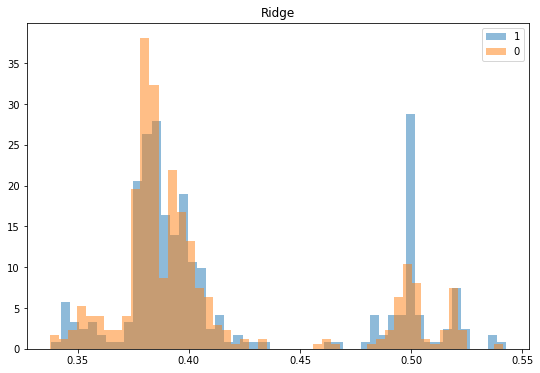

In [62]:
show_pre_match_before(ps, 'Treatment', 'Ridge')

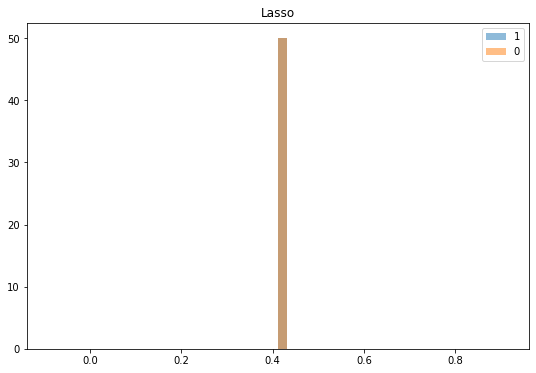

In [63]:
show_pre_match_before(ps, 'Treatment', 'Lasso')

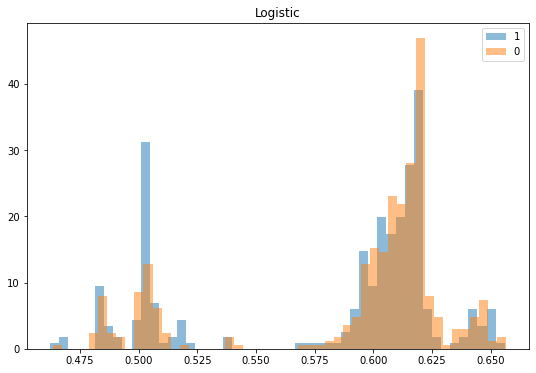

In [64]:
show_pre_match_before(ps, 'Treatment', 'Logistic')

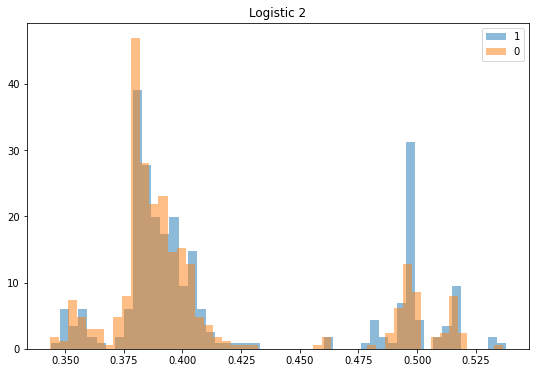

In [67]:
show_pre_match_before(ps, 'Treatment', 'Logistic 2')

In [70]:
def dist(a,b):
    """
    목적: 절댓값 거리 구하기
    
    인풋
    a: 어떤 실수값 1
    b: 어떤 실수값 2
    
    리턴
    두 실수 a,b 사이의 절대값 차이 
    
    """
    return abs(a-b) 

# return list of pairs (treat, control)
def match_sample_without_replace(d_trt, d_ctrl):
    """
    목적: replace 없이 샘플링을 하는 함수
    
    """
    sam = []
    for k, v in d_trt.items():
        tmp = {}
        for k_, v_ in d_ctrl.items():
            tmp[k_] = dist(v, v_) 
        #print(k, tmp)
        mini = min(tmp, key = tmp.get) 
        sam.append((k, mini)) 
        #print(mini) 
        del d_ctrl[mini]
    return sam

def match_sample_with_replace(d_trt, d_ctrl):
    """
    목적: with replacement로 샘플링을 하는 함수 
    
    인풋
    d_trt: treatment 값이 1인 데이터 인덱스와 특정 regressor에 따른 점수를 묶어 나타낸 dictionary 형식의 데이터
    d_ctrl: treatment 값이 0인 데이터 인덱스와 특정 regressor에 따른 점수를 묶어 나타낸 dictionary 형식의 데이터
    
    리턴
    treatment와 control 점수 차이가 최소인 한 쌍의 인덱스를 뽑아서, 한 쪽은 treatment sample로, 다른쪽은 control sample로 들어갑니다. 
    
    1. input: dictionary data type, treatment, control 
    2. first input is the actor, and second is the responder 
    3. return the list of indices for each group: treatment and control 5
    """
    sam = []
    for k, v in d_trt.items():
        tmp = {}
        for k_, v_ in d_ctrl.items():
            tmp[k_] = dist(v, v_)
        mini = min(tmp, key = tmp.get)
        sam.append((k, mini))
    treat = []
    control = []
    for t,c in sam:
        treat.append(t)
        control.append(c) 
        
    treat = list(set(treat)) 
    control = list(set(control))
    # indices
    
    return treat, control

In [71]:
def zip_up_idx_reg(data, treatment_colname, reg_col_name):
    """
    목적: regressor별로 treatment 데이터의 인덱스와 regresson 값, control 데이터의 인덱스와 regression 값을 를 
        dictionary 형식으로 묶어내기
    
    인풋
    treat: treatment 값이 1인 데이터프레임
    control: treatment 값이 0인 데이터프레임
    regf_col_name: 사용할 regressor의 칼럼 이름
    
    리턴
    treatment가 1인 데이터의 인덱스값과 해당 regressor의 값 
    treatment가 0인 데이터의 인덱스값과 해당 regressor의 값 
    
    treat: dataframe treatment value is 1
    control: dataframe treatment value is 0 
    reg_col_name: column name of a specific target regressor [Logit, Lasso, Ridge, RF] Sep 27 2020 
    
    reeturn the dictionary key: value pair (key: index of the data, value: regressor value)
    """
    
    treat = data[data[treatment_colname]==1]
    control = data[data[treatment_colname]==0]
    
    ones = dict(list(zip(treat[reg_col_name].index, treat[reg_col_name])))
    zeros = dict(list(zip(control[reg_col_name].index, control[reg_col_name])))
    return ones, zeros

In [72]:
ridge_one, ridge_zero = zip_up_idx_reg(ps, 'Treatment', 'Ridge')
logit_one, logit_zero = zip_up_idx_reg(ps, 'Treatment', 'Logistic 2')

In [73]:
ridge_treat, ridge_control = match_sample_with_replace(ridge_one, ridge_zero)
logit_treat, logit_control = match_sample_with_replace(logit_one, logit_zero)

In [74]:
def save_pre_match_after(data, treatment_colname, algo_colname):
    
    treatment = data[data[treatment_colname]==1]
    control = data[data[treatment_colname]==0]
    
    dic_treat = dict(list(zip(treatment[algo_colname].index, treatment[algo_colname])))
    dic_control = dict(list(zip(control[algo_colname].index, control[algo_colname])))
    
    matched_treat, matched_control = match_sample_with_replace(dic_treat, dic_control)
    # indices
    
    treat_data = data.loc[matched_treat]
    control_data = data.loc[matched_control]
    print(algo_colname,"\ntreated: ", treat_data.shape, "\ncontrolled: ", control_data.shape,"\n")
    return treat_data, control_data

In [76]:
logit_matched_treat, logit_matched_control = save_pre_match_after(ps, 'Treatment', 'Logistic 2')

Logistic 2 
treated:  (297, 5) 
controlled:  (133, 5) 



In [78]:
ridge_matched_treat, ridge_matched_control = save_pre_match_after(ps, 'Treatment', 'Ridge')

Ridge 
treated:  (297, 5) 
controlled:  (131, 5) 



In [83]:
def show_pre_match_after(data, treatment_colname, algo_colname):
    plt.figure(figsize = (9, 6))
    
    treatment = data[data[treatment_colname]==1]
    control = data[data[treatment_colname]==0]
    
    dic_treat = dict(list(zip(treatment[algo_colname].index, treatment[algo_colname])))
    dic_control = dict(list(zip(control[algo_colname].index, control[algo_colname])))
    
    matched_treat, matched_control = match_sample_with_replace(dic_treat, dic_control)
    # indices
    
#     treat_data = data.loc[matched_treat]
#     control_data = data.loc[matched_control]
    
    plt.title(algo_colname)
    plt.hist([dic_treat[x] for x in matched_treat], density = True, bins = 50, alpha = 0.5, color = 'r', label = '1')
    plt.hist([dic_control[x] for x in matched_control], density = True, bins = 50, alpha = 0.5, color = 'c', label = '0')
    plt.legend(loc = 'upper right')
    
    #plt.savefig('pre_matching_after '+algo_colname+str(date.today())+'.png')
    plt.show()
    

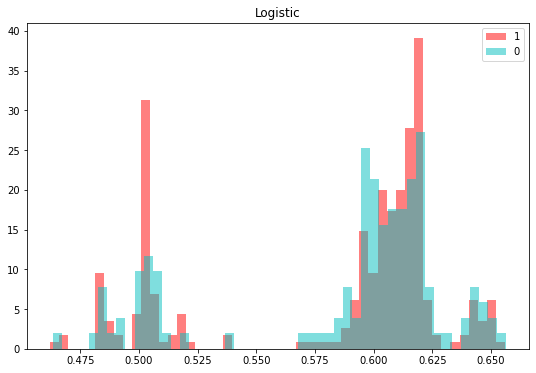

In [84]:
show_pre_match_after(ps, 'Treatment', 'Logistic')

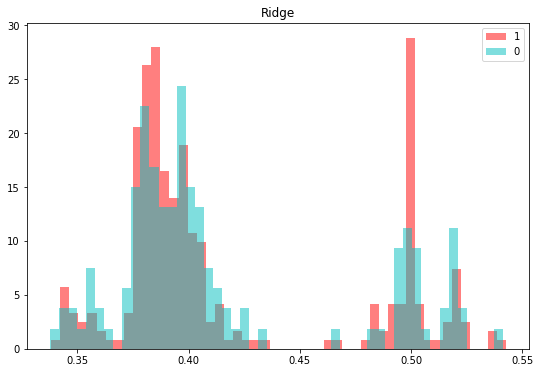

In [85]:
show_pre_match_after(ps, 'Treatment', 'Ridge')